In [5]:
import random
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Mersenne Twister pseudo-random number generator.
rng = np.random.RandomState(None) 

Let's generate a random cloud of 2000 2d points, and visualize it as follows.

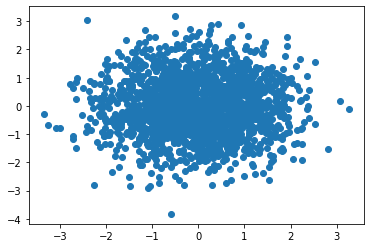

In [89]:
Y = rng.randn(2, 2000)
plt.scatter(Y[0, :], Y[1, :])

In [90]:
np.corrcoef(Y)

array([[ 1.        , -0.00446431],
       [-0.00446431,  1.        ]])

Let's perform a special linear transformation, create a new dataset X1, and visualize it. What do you observe and why? Why do all points line now on a line?

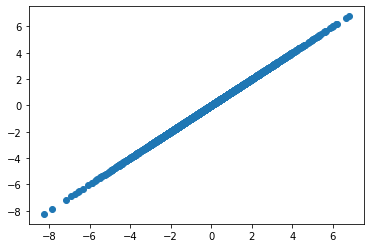

In [92]:
X1 = np.dot(np.array([[1, 2], [1, 2]]), Y)
plt.scatter(X1[0, :], X1[1, :])

In [93]:
np.corrcoef(X1)

array([[1., 1.],
       [1., 1.]])

Let's create a slightly different mapping, but still make sure most of the data variance is along one of the two dimensions.  

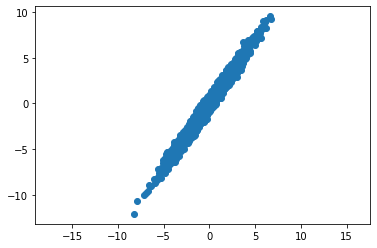

In [98]:
X = np.dot(np.array([[1, 2], [1, 3]]), Y)
plt.scatter(X[0, :], X[1, :])
plt.axis('equal');




In [97]:
np.corrcoef(X)

array([[1.        , 0.99138691],
       [0.99138691, 1.        ]])

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X.T)

PCA(n_components=2)

In [103]:
pca

PCA(n_components=2)

In [104]:
print(pca.components_)

[[-0.57560212 -0.81772991]
 [-0.81772991  0.57560212]]


In [114]:
print(pca.explained_variance_/pca.explained_variance_.sum()) 

[0.99555642 0.00444358]


In [120]:
np.square(pca.singular_values_)/(np.square(pca.singular_values_).sum())

array([0.99555642, 0.00444358])

Let's project the data into the top PC. 

In [123]:
pca = PCA(n_components=1)
pca.fit(X.T)
X_pca = pca.transform(X.T)
print("original shape:   ", X.T.shape)
print("transformed shape:", X_pca.shape)

original shape:    (2000, 2)
transformed shape: (2000, 1)


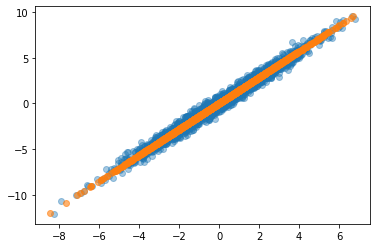

In [128]:
X_proj = pca.inverse_transform(X_pca)
X = X.T
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
plt.scatter(X_proj[:, 0], X_proj[:, 1], alpha=0.6)


In [130]:
np.corrcoef(X.T)

array([[1.        , 0.98998853],
       [0.98998853, 1.        ]])

In [132]:
np.corrcoef(X_proj.T)

array([[1., 1.],
       [1., 1.]])

 Let's verify some othe properties we saw from class. First let's compute the eigenvalue decomposition of $X^TX$.


In [144]:
lmbda, v = np.linalg.eig(np.dot(X.T,X))
print(lmbda)
print(v)

[  131.48464377 29473.5475269 ]
[[-0.81769206 -0.57565588]
 [ 0.57565588 -0.81769206]]


In [140]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_.T)


[[-0.57560212 -0.81772991]
 [-0.81772991  0.57560212]]


In [162]:
print("Singular values")
sigma = pca.singular_values_
print( round(sigma[0],1) )
print( round(sigma[1],1) )

print("\nSquare root of eigevalues of X'X")
print( round( np.sqrt(lmbda[0]),1) )
print( round( np.sqrt(lmbda[1]),1) )

Singular values
171.6
11.5

Square root of eigevalues of X'X
11.5
171.7


Let's compute the eigendecomposition of $XX^T$. Notice that this is computationally expensive since it is no longer 2x2 but 2000x2000!

In [165]:
lmbda2, v2 = np.linalg.eig(np.dot(X,X.T))
print(lmbda2)


[ 2.94735475e+04+0.00000000e+00j  1.31484644e+02+0.00000000e+00j
  2.62544030e-12+3.04354987e-12j ... -1.55166087e-17-4.11538648e-18j
 -3.36000485e-18+0.00000000e+00j  8.07673458e-19+0.00000000e+00j]


 The complex numbers here are due to numerical issues.  Same thing for the values that are close to 0.

In [166]:
print(lmbda2.real)

[ 2.94735475e+04  1.31484644e+02  2.62544030e-12 ... -1.55166087e-17
 -3.36000485e-18  8.07673458e-19]


Let's verify the rank is 2.

In [164]:
np.linalg.matrix_rank(np.dot(X,X.T))

2

Finally let's look the singular value decomposition of X. 

In [167]:
np.linalg.svd(X)

(array([[-4.25982639e-02,  4.22105946e-02, -3.76864991e-02, ...,
         -4.23918297e-03,  1.52069475e-02, -3.16278320e-02],
        [-8.54983231e-03, -2.34495025e-02,  3.36877537e-02, ...,
          2.18608151e-02,  2.92331584e-02,  1.28333142e-03],
        [-3.90038791e-02,  3.21239531e-02,  9.97565787e-01, ...,
         -8.75781548e-04, -4.44339256e-04, -1.14387378e-03],
        ...,
        [-5.09163282e-03,  2.16545746e-02, -8.39385357e-04, ...,
          9.99518638e-01, -5.78294410e-04, -1.26565289e-04],
        [ 1.40695272e-02,  2.97922795e-02, -3.58085783e-04, ...,
         -5.53905856e-04,  9.98927275e-01,  4.66552440e-04],
        [-3.16816473e-02,  1.62395807e-05, -1.19822933e-03, ...,
         -1.63224458e-04,  4.16098608e-04,  9.99036879e-01]]),
 array([171.67861698,  11.46667536]),
 array([[-0.57565588, -0.81769206],
        [-0.81769206,  0.57565588]]))

What do you observe?